In [8]:
%matplotlib inline
import pandas as pd

In [9]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [10]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [11]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff82a9a79e8>], dtype=object)

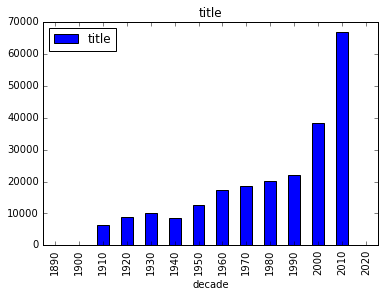

In [45]:
#ndf = titles.groupby('year').count()[['title']]
titles['decade'] = titles.year // 10 * 10
xx = titles.groupby('decade').count()[['title']]
xx['decade'] = xx.index 
xx
xx.plot(x = 'decade', y = "title", kind = "bar", subplots = True)

### Use groupby() to plot the number of "Hamlet" films made each decade.

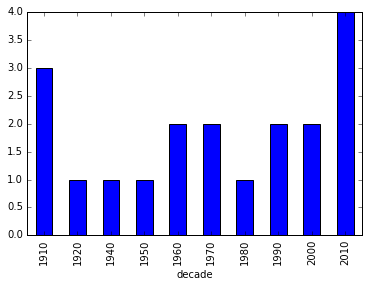

In [13]:
xx = titles[titles.title == 'Hamlet'].groupby('decade').size()
xx.plot(x = 'decade', y = 'year', kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [15]:
cast['decade'] = cast.year // 10*10
xx = cast[(cast.decade == 1950) & (cast.n ==1)].groupby('type').size()
xx

type
actor      6563
actress    2940
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [19]:
xx = cast[(cast.decade == 1950) & (cast.n >= 1) & (cast.n <= 5)].groupby('type').count()
xx

,title,year,name,character,n,decade
type,,,,,,
actor,27747,27747,27747,27747,27747,27747
actress,15941,15941,15941,15941,15941,15941


In [20]:
xx = cast[(cast.decade == 1950) & (cast.n >= 1) & (cast.n <= 5)].groupby('type').size()
xx

type
actor      27747
actress    15941
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [53]:
xx = cast[cast.title.str.contains('Pink Panther')].groupby(['title', 'year']).count()
#http://pandas.pydata.org/pandas-docs/stable/api.html#string-handling
xx

name  type  character   n  decade
title                          year                                   
Curse of the Pink Panther      1983    67    67         67  63      67
Revenge of the Pink Panther    1978    64    64         64  57      64
Son of the Pink Panther        1993    46    46         46  43      46
The Pink Panther               1963    19    19         19  15      19
                               2006    89    89         89  51      89
The Pink Panther 2             2009    82    82         82  36      82
The Pink Panther Strikes Again 1976    73    73         73  61      73
The Return of the Pink Panther 1975    30    30         30  27      30
Trail of the Pink Panther      1982    40    40         40  32      40

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [44]:
xx = cast[cast.name == 'Frank Oz'].groupby(['title', 'year']).count()
#http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
xx = xx.reset_index()
xx = xx[xx.name > 1].sort_values('year', ascending = False)
xx

,title,year,name,type,character,n,decade
8,Muppets from Space,1999,4,4,4,4,4
18,The Adventures of Elmo in Grouchland,1999,3,3,3,3,3
7,Muppet Treasure Island,1996,4,4,4,4,4
22,The Muppet Christmas Carol,1992,7,7,7,7,7
2,Follow That Bird,1985,3,3,3,3,3
24,The Muppets Take Manhattan,1984,7,7,7,7,7
20,The Dark Crystal,1982,2,2,2,2,2
0,An American Werewolf in London,1981,2,2,2,2,2
21,The Great Muppet Caper,1981,6,6,6,6,6
23,The Muppet Movie,1979,8,8,8,8,8


### List each of the characters that Frank Oz has portrayed at least twice.

In [52]:
xx = cast[cast.name == 'Frank Oz'].groupby('character').size()
xx = xx.reset_index()
xx = xx.rename(columns = {0: 'character_count'})
xx[xx.character_count > 1].sort_values('character_count')

,character,character_count
15,Grover,2
2,Bert,3
5,Cookie Monster,3
10,Fozzie Bear,4
25,Sam the Eagle,5
0,Animal,6
18,Miss Piggy,6
34,Yoda,7
